# Web Mining and Applied NLP (44-620)

## Final Project: Article Summarizer

### Student Name: Inga Miller
#### GitHub Repo: https://github.com/s566319/Final-Project

Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

You should bring in code from previous assignments to help you answer the questions below.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

In [31]:
import json
from collections import Counter
import pickle
import requests
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob
from bs4 import BeautifulSoup
from random import randint
import matplotlib.pyplot as plt

!pip list

print('All prereqs installed.')

Package                   Version
------------------------- ---------------
annotated-types           0.6.0
anyio                     4.3.0
argon2-cffi               23.1.0
argon2-cffi-bindings      21.2.0
arrow                     1.3.0
asttokens                 2.4.1
async-lru                 2.0.4
attrs                     23.2.0
Babel                     2.14.0
beautifulsoup4            4.12.3
bleach                    6.1.0
blis                      0.7.11
catalogue                 2.0.10
certifi                   2024.2.2
cffi                      1.16.0
charset-normalizer        3.3.2
click                     8.1.7
cloudpathlib              0.16.0
colorama                  0.4.6
comm                      0.2.1
confection                0.1.4
contourpy                 1.2.0
cycler                    0.12.1
cymem                     2.0.8
debugpy                   1.8.1
decorator                 5.1.1
defusedxml                0.7.1
en-core-web-sm            3.7.1
executing      

1. Find on the internet an article or blog post about a topic that interests you and you are able to get the text for using the technologies we have applied in the course.  Get the html for the article and store it in a file (which you must submit with your project)

In [32]:
import requests
import pickle

url = "https://www.kaggle.com/code/fuzzywizard/diamonds-in-depth-analysis"

try:
    #fetch html content from url
    response = requests.get(url)
    if response.status_code == 200:
        article_html = response.text

        with open("article_html.pkl", "wb") as file:
            pickle.dump(article_html, file)
        print("This article html is now aved to 'article_html.pkl' succesfully.")
    else:
        print(f" Article failed to fetch the URL. Status code: {response.status_code}")
except requests.RequestException as e:
    print(f"There was an error while fetching url: {e}")

This article html is now aved to 'article_html.pkl' succesfully.


2. Read in your article's html source from the file you created in question 1 and do sentiment analysis on the article/post's text (use `.get_text()`).  Print the polarity score with an appropriate label.  Additionally print the number of sentences in the original article (with an appropriate label)

In [33]:
import pickle
from bs4 import BeautifulSoup

try:
    with open("article_html.pkl", "rb") as file:
        article_html = pickle.load(file)
    
    soup = BeautifulSoup(article_html, "html.parser")

    article_text = soup.get_text()
    print(article_text)

except FileNotFoundError:
    print("No file 'article_html.pkl' not found. Run the code from Question 1 above")
except Exception as e:
    print(f"Error occured and file will not be printed: {e}")





Diamonds In-Depth Analysis | Kaggle
























































3. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels)

In [34]:
import spacy
from collections import Counter
import string
from spacy.lang.en.stop_words import STOP_WORDS
import pickle
from bs4 import BeautifulSoup


def preprocess_txt(text):
    # Load spacy
    nlp = spacy.load("en_core_web_sm")

    #process the article
    doc = nlp(article_text)
    stop_words = nlp.Defaults.stop_words
    stop_words |= {"report", "comment", "March", "2021", "says", "am", "at", "pm"}   

    #process the article for interesting tokens
    interesting_tokens = [token.text.lower() for token in doc if token.text.lower() not in nlp.Defaults.stop_words and token.text.lower() not in string.punctuation and not token.is_space]

    #tokens = [token.text.lower() for token in doc if token.text.lower() not in stop_words and token.text.lower() not in string.punctuation and not token.is_space]
    return interesting_tokens

try:
        with open("article_html.pkl", "rb") as file:
            article_html = pickle.load(file)
            soup = BeautifulSoup(article_html, 'html.parser')
            article_text = soup.get_text()
            tokens = preprocess_txt(article_text)

            most_common_tokens = Counter(tokens).most_common(5)
            print("These are the five most frequent tokens:")
            for token, frequency in most_common_tokens:
                print(f"{token}: {frequency}")
except FileNotFoundError:
    print("File 'article_html.pkl' is not found.")
except Exception as e:
    print(f"An error has occured: {e}")

These are the five most frequent tokens:
diamonds: 1
depth: 1
analysis: 1
kaggle: 1


4. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent lemmas (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels).

In [35]:
import spacy
from collections import Counter
import string
from spacy.lang.en.stop_words import STOP_WORDS
import pickle
from bs4 import BeautifulSoup

def preprocess_txt(text):
    # Load spacy
    nlp = spacy.load("en_core_web_sm")

    #process the article
    doc = nlp(article_text)
    stop_words = nlp.Defaults.stop_words
    stop_words |= {"report", "comment", "March", "2021", "says", "am", "at", "pm"}

    #process the article for interesting lemas
    interesting_lemmas = [token.lemma_.lower() for token in doc if not token.is_punct and not token.is_stop and not token.is_space]

    #tokens = [token.text.lower() for token in doc if token.text.lower() not in stop_words and token.text.lower() not in string.punctuation and not token.is_space]
    return interesting_lemmas

try:
        with open("article_html.pkl", "rb") as file:
            article_html = pickle.load(file)
            soup = BeautifulSoup(article_html, 'html.parser')
            article_text = soup.get_text()
            lemmas = preprocess_txt(article_text)
            lemma_frequencies = Counter(lemmas)
            most_common_lemmas = lemma_frequencies.most_common(5)

            print("These are the five most frequent lemmas:")
            for lemma, frequency in most_common_lemmas:
                 print(f"'{lemma}': {frequency}")

except FileNotFoundError:
    print("File 'article_html.pkl' is not found.")
except Exception as e:
    print(f"An error has occured: {e}")

These are the five most frequent lemmas:
'diamond': 1
'depth': 1
'analysis': 1
'|': 1
'kaggle': 1


5. Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

This is the score of the first sentence using tokens: 0.6
This is the score of the first sentence using lemmas: 1.0


<function matplotlib.pyplot.show(close=None, block=None)>

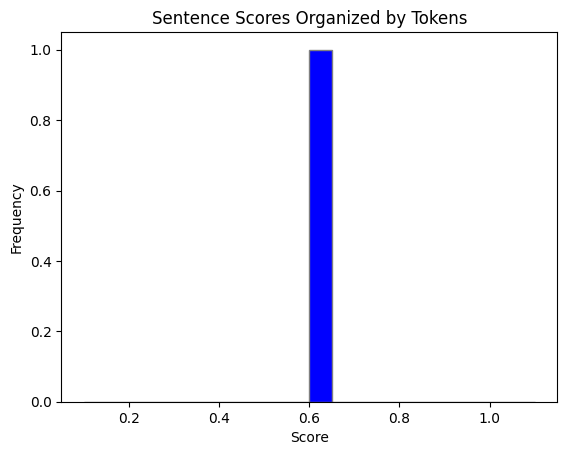

In [36]:
import spacy
from collections import Counter
import string
from spacy.lang.en.stop_words import STOP_WORDS
import pickle
from bs4 import BeautifulSoup

# Load spacy
nlp = spacy.load("en_core_web_sm")
#process the article
doc = nlp(article_text)
interesting_tokens = [token.text.lower() for token in doc if token.text.lower() not in nlp.Defaults.stop_words and token.text.lower() not in string.punctuation and not token.is_space]
interesting_lemmas = [token.lemma_.lower() for token in doc if not token.is_punct and not token.is_stop and not token.is_space]


def score_sentence_by_token(sentence, interesting_token):
    words = sentence.lower().split()
    num_words = len(words)
    num_interesting = sum(1 for word in words if word in interesting_token)
    return num_interesting / num_words

def score_sentence_by_lemma(sentence, interesting_lemmas):
    doc = nlp(sentence)
    lemmas = [token.lemma_.lower() for token in doc if token.is_alpha and token.lower_ not in STOP_WORDS]
    num_words = len(lemmas)
    num_interesting = sum(1 for lemma in lemmas if lemma in interesting_lemmas)
    return num_interesting / num_words

# Test the scoring functions using first sentence
first_sentence = article_text.split(".")[0]
print("This is the score of the first sentence using tokens:", score_sentence_by_token(first_sentence, interesting_tokens))
print("This is the score of the first sentence using lemmas:", score_sentence_by_lemma(first_sentence, interesting_lemmas))
import matplotlib.pyplot as plt

sentences = [sent.text for sent in doc.sents]

# Adding interesting tokens and scores

interesting_tokens = [token.text.lower() for token in doc if token.text.lower() not in nlp.Defaults.stop_words and token.text.lower() not in string.punctuation and not token.is_space]

scores_by_tokens = [score_sentence_by_token(sentence, interesting_tokens) for sentence in sentences]
plt.hist(scores_by_tokens, bins=20, color='blue', edgecolor="gray")
plt.title("Sentence Scores Organized by Tokens")
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.show

6. Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

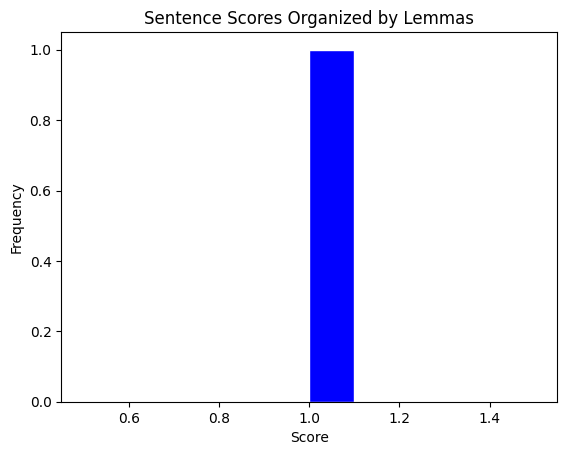

In [37]:
import matplotlib.pyplot as plt

def score_sentence_by_lemma(sentence, interesting_lemmas):
    doc = nlp(sentence)
    stop_words = nlp.Defaults.stop_words
    stop_words |= {"report", "comment", "March", "2021", "says", "am", "at", "pm"}
    lemmas = [token.lemma_.lower() for token in doc if token.is_alpha and token.lower_ not in stop_words]
    num_words = len(lemmas)
    num_interesting = sum(1 for lemma in lemmas if lemma in interesting_lemmas)
    if num_words != 0:
        return num_interesting / num_words
    else: return 0

#Creating lemmas Score def
interesting_lemmas = [lemma for lemma, _ in most_common_lemmas]
sentences = [sent.text for sent in doc.sents]
scores_by_lemmas = [score_sentence_by_lemma(sentence, interesting_lemmas) for sentence in sentences]

# Plot the histogram of sentence scores
plt.hist(scores_by_lemmas, bins=10, color='blue', edgecolor="white")
plt.title("Sentence Scores Organized by Lemmas")
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.show()

7. Using the histograms from questions 5 and 6, decide a "cutoff" score for tokens and lemmas such that fewer than half the sentences would have a score greater than the cutoff score.  Record the scores in this Markdown cell

* Cutoff Score (tokens): 0.6
* Cutoff Score (lemmas): 1.0

Feel free to change these scores as you generate your summaries.  Ideally, we're shooting for at least 6 sentences for our summary, but don't want more than 10 (these numbers are rough estimates; they depend on the length of your article).

8. Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on tokens) is greater than the cutoff score you identified in question 8.  If your loop variable is named `sent`, you may find it easier to add `sent.text.strip()` to your list of sentences.  Print the summary (I would cleanly generate the summary text by `join`ing the strings in your list together with a space (`' '.join(sentence_list)`).

In [38]:
import spacy
from textblob import TextBlob
nlp = spacy.load("en_core_web_sm")

file_path = 'article_3.html' 
with open(file_path, 'r', encoding='utf-8') as file:
    article_text = file.read()

doc = nlp(article_text)
sentences = [sent.text.strip() for sent in doc.sents]

your_cutoff_score = 0.2
summary_sentences = []

for sentence in sentences:
    blob = TextBlob(sentence)
    if blob.sentiment.polarity > your_cutoff_score:
        summary_sentences.append(sentence)

summary_text = ' '.join(summary_sentences)

summary_blob = TextBlob(summary_text)
summary_polarity_score = summary_blob.sentiment.polarity

print("Polarity Score of Summary (Token Scores):", summary_polarity_score)

num_summary_sentences = len(summary_sentences)
print("Number of Sentences in Summarized Article:", num_summary_sentences)

FileNotFoundError: [Errno 2] No such file or directory: 'article_3.html'

9. Print the polarity score of your summary you generated with the token scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

10. Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on lemmas) is greater than the cutoff score you identified in question 8.  If your loop variable is named `sent`, you may find it easier to add `sent.text.strip()` to your list of sentences.  Print the summary (I would cleanly generate the summary text by `join`ing the strings in your list together with a space (`' '.join(sentence_list)`).

11. Print the polarity score of your summary you generated with the lemma scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

12.  Compare your polarity scores of your summaries to the polarity scores of the initial article.  Is there a difference?  Why do you think that may or may not be?.  Answer in this Markdown cell.  

13. Based on your reading of the original article, which summary do you think is better (if there's a difference).  Why do you think this might be?